<a href="https://colab.research.google.com/github/simaafshar/MNase-data/blob/master/Copy_of_heatmap_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

['Sheet1']
  Code            Location  W22_TPC  W22_EB  W23_TPC  W23_EB  W24_TPC  W24_EB  \
0   D1  Shoe changing room       30       0      390       0      330       0   
1   D2      Elevator floor      300       0        0       0       40       0   
2   D3   Tool storage room       40       0        0       0       40       0   
3   D4  Dryer control room        0       0       30       0       60       0   
4   D5                 NaN       60       0     3000       0       10       0   

   W25_TPC  W25_EB  ...  W31_TPC    W31_EB  W32_TPC W32_EB  W33_TPC W33_EB  \
0      NaN     NaN  ...      530  Detected       10      0      NaN    NaN   
1      0.0     0.0  ...        0         0       10      0      0.0    0.0   
2     50.0     0.0  ...        0         0       10      0      0.0    0.0   
3      0.0     0.0  ...        0         0        0      0      0.0    0.0   
4     40.0     0.0  ...        0         0       40      0     10.0    0.0   

   W34_TPC     W34_EB  W35_TPC   

/tmp/ipython-input-3-3370184305.py:24: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  eb_data = df[eb_cols].applymap(lambda x: str(x).strip().lower() if pd.notnull(x) else '0')
/tmp/ipython-input-3-3370184305.py:27: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  eb_data = eb_data.replace({'detected': 1, '0': 0, 'nan': 0})


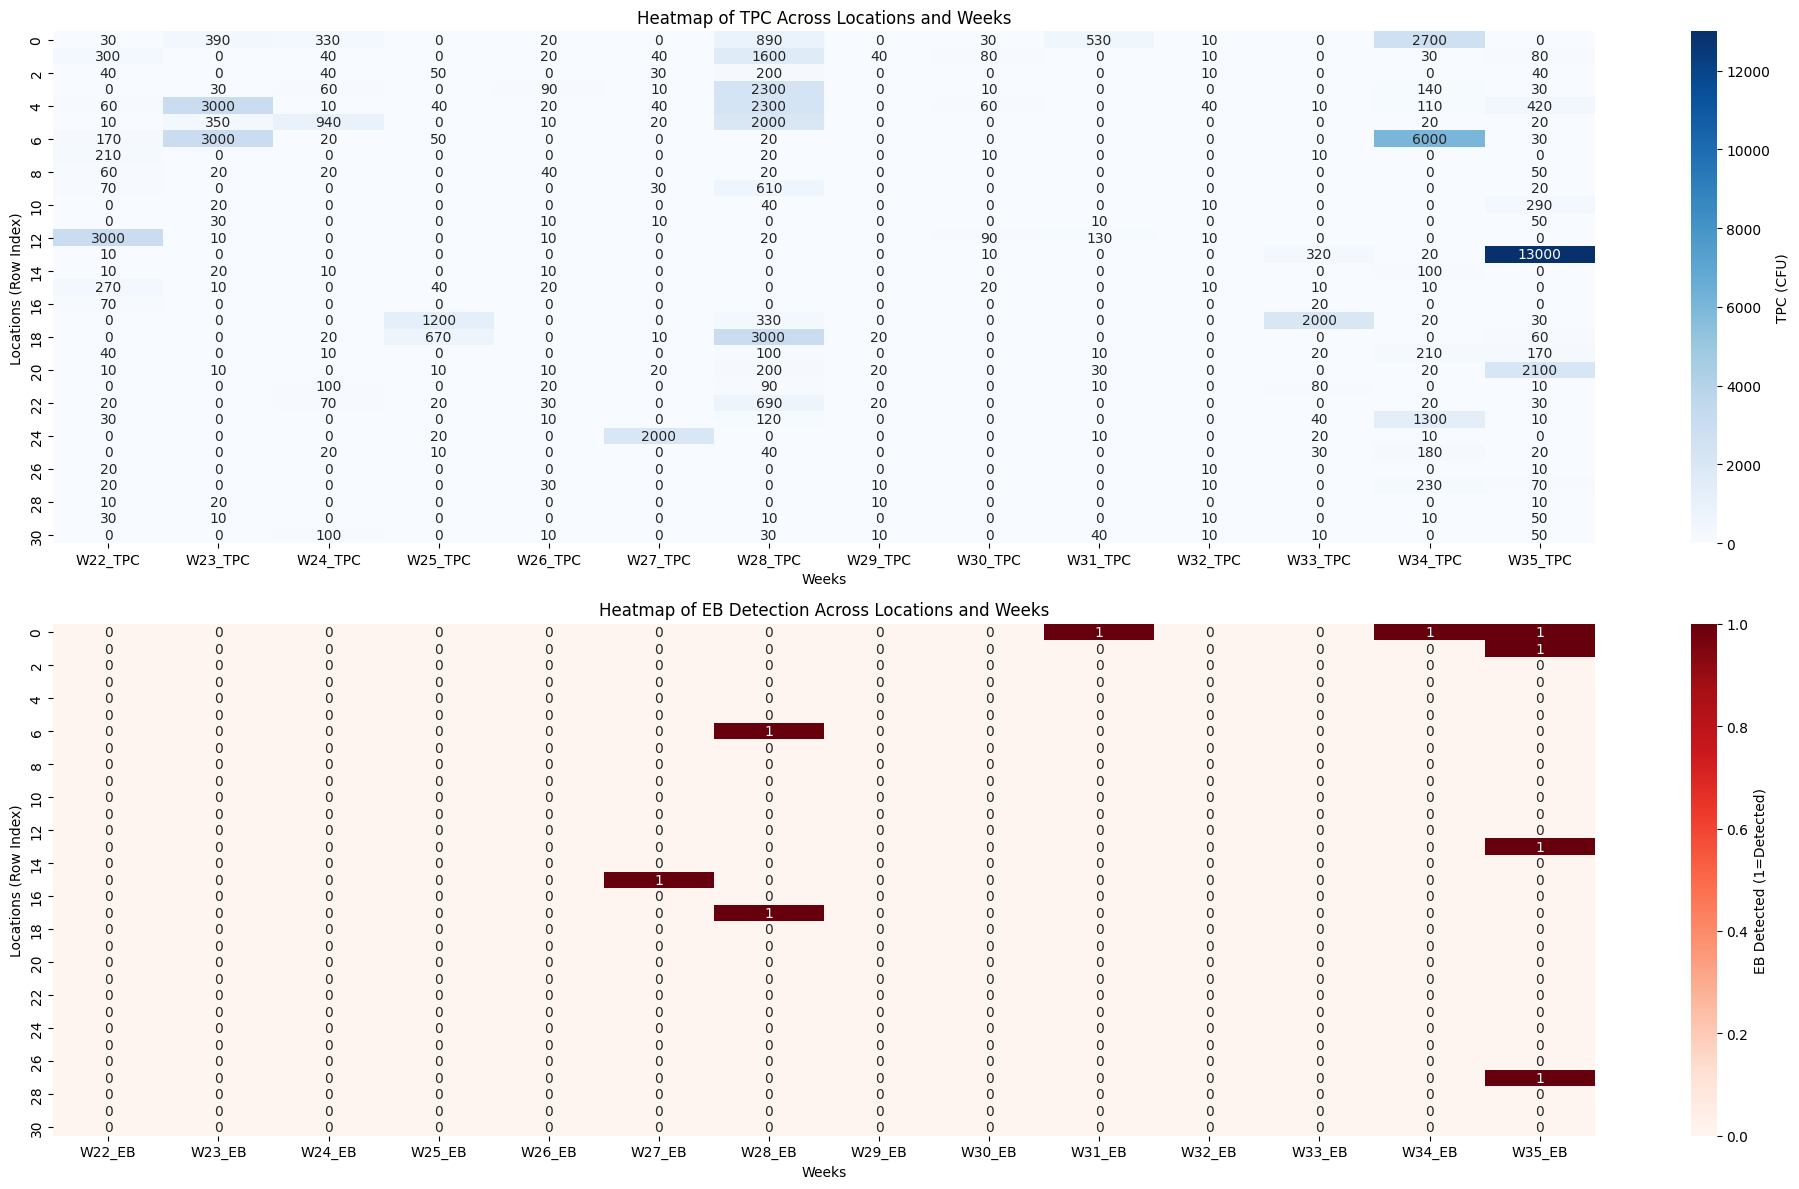

In [ ]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load Excel file
file_path = "Sima5.xlsx"  # Change this path if needed
xls = pd.ExcelFile(file_path)

# Optional: Check available sheets
print(xls.sheet_names)

# Step 3: Load data from the sheet
df = pd.read_excel(file_path, sheet_name="Sheet1")

# Step 4: Inspect the data
print(df.head())

# Step 5: Extract EB columns and clean robustly
eb_cols = [col for col in df.columns if "EB" in col]

# Normalize text: lowercase and strip spaces
eb_data = df[eb_cols].applymap(lambda x: str(x).strip().lower() if pd.notnull(x) else '0')

# Map 'detected' to 1, all else to 0
eb_data = eb_data.replace({'detected': 1, '0': 0, 'nan': 0})

# Convert to numeric
eb_data = eb_data.apply(pd.to_numeric, errors="coerce").fillna(0)

# Step 6: Extract TPC columns and clean
tpc_cols = [col for col in df.columns if "TPC" in col]
tpc_data = df[tpc_cols].fillna(0)

# Optional: Verify data cleaning
print("TPC Data Sample:")
print(tpc_data.head())
print("EB Data Sample:")
print(eb_data.head())

# Step 7: Plot heatmaps
plt.figure(figsize=(20, 12))

# Heatmap for TPC
plt.subplot(2, 1, 1)
sns.heatmap(
    tpc_data,
    annot=True,
    fmt=".0f",
    cmap="Blues",
    cbar_kws={"label": "TPC (CFU)"}
)
plt.title("Heatmap of TPC Across Locations and Weeks")
plt.ylabel("Locations (Row Index)")
plt.xlabel("Weeks")

# Heatmap for EB detection
plt.subplot(2, 1, 2)
sns.heatmap(
    eb_data,
    annot=True,
    fmt=".0f",
    cmap="Reds",
    cbar_kws={"label": "EB Detected (1=Detected)"}
)
plt.title("Heatmap of EB Detection Across Locations and Weeks")
plt.ylabel("Locations (Row Index)")
plt.xlabel("Weeks")

plt.tight_layout()
plt.show()
